In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
def kmeans_python(X, k, max_iters=100):
    # randomly initialize centroids from samples
    np.random.seed(42)
    centroids = X[np.random.choice(range(X.shape[0]), k, replace=False)]
    
    for _ in range(max_iters):
        # assign points to nearest centroid
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # compute new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # stop if converged
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids


In [6]:
file_path = r"C:\Users\Sriharshini\Downloads\nbfc_credit_risk_dataset.csv"
df = pd.read_csv(file_path)

In [8]:
df.head()

,borrower_id,age,business_type,years_in_operation,region,annual_revenue,ebitda_margin,cashflow_stability,bank_balance_avg,dti_ratio,dscr,loan_amount,tenure_months,interest_rate,past_delinquencies,dpd_last_6m,repayment_consistency,monthly_inflow,monthly_outflow,default
0,1,39,Retail,6,North,61.85,13.28,0.59,0.10,0.11,1.49,6.64,24,15.94,0,8,0.95,3.26,10.24,0
1,2,33,Manufacturing,0,West,51.95,16.90,1.00,5.41,0.34,1.04,15.35,36,16.45,0,4,0.83,12.85,4.16,1
2,3,41,Construction,0,North,93.49,13.60,0.78,3.58,0.43,1.84,22.60,48,17.68,0,10,0.63,1.34,4.15,0
3,4,50,Retail,3,South,76.86,3.36,0.94,2.28,0.43,1.13,13.57,36,14.98,0,0,1.00,6.51,6.26,0
4,5,32,Healthcare,3,East,60.85,13.34,0.94,1.54,0.37,1.46,14.03,12,10.00,0,0,0.52,1.00,9.94,0


In [10]:
cluster_features = [
    "annual_revenue",
    "ebitda_margin",
    "cashflow_stability",
    "bank_balance_avg",
    "dti_ratio",
    "dscr",
    "loan_amount",
    "past_delinquencies",
    "dpd_last_6m",
    "repayment_consistency"
]

X_cluster = df[cluster_features]


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [16]:
labels, centroids = kmeans_python(X_scaled, k=4)
df["cluster_id"] = labels

In [18]:
cluster_profile = df.groupby("cluster_id")[cluster_features + ["default"]].mean()
cluster_profile

,annual_revenue,ebitda_margin,cashflow_stability,bank_balance_avg,dti_ratio,dscr,loan_amount,past_delinquencies,dpd_last_6m,repayment_consistency,default
cluster_id,,,,,,,,,,,
0,50.008245,12.151439,0.734239,1.754695,0.468013,1.436425,11.794902,0.009790,2.699057,0.752701,0.266135
1,49.658212,12.108577,0.697474,2.666278,0.454794,1.398689,10.522972,1.301807,3.726644,0.743326,0.452134
2,52.741526,11.990603,0.658793,4.792622,0.427476,1.407909,8.302273,0.110816,2.885009,0.725343,0.261101
3,53.267223,11.928589,0.696291,3.088719,0.459726,1.363375,10.270818,0.242772,14.398305,0.747941,0.314556


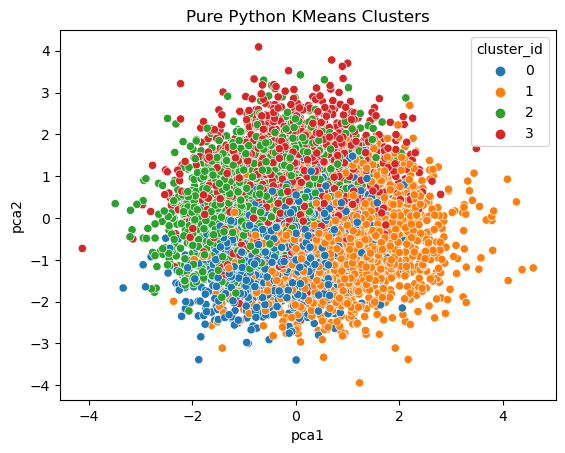

In [20]:
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_scaled)

df["pca1"] = pca_2d[:, 0]
df["pca2"] = pca_2d[:, 1]

sns.scatterplot(
    data=df,
    x="pca1", y="pca2",
    hue="cluster_id",
    palette="tab10"
)
plt.title("Pure Python KMeans Clusters")
plt.show()

In [28]:
segmentation_output = df[[
    "borrower_id",
    "cluster_id",
    "annual_revenue",
    "dti_ratio",
    "dscr",
    "dpd_last_6m",
    "repayment_consistency",
    "default"
]]

segmentation_output.to_csv("C:\\Users\\Sriharshini\\credit_project\\segmentation_output.csv", index=False)
print("Segmentation output saved successfully!")

Segmentation output saved successfully!
